In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [3]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [4]:
## drop month day and year
df.drop(['day','month','year'],axis=1,inplace=True)

In [5]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [6]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [7]:
df['Classes']=np.where(df['Classes'].str.contains("not fire"),0,1)

In [8]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [9]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [10]:
X = df.drop('FWI',axis=1)
y=df['FWI']

In [11]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [12]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.42,random_state=42)

In [14]:
X_train.shape

(140, 11)

In [15]:
X_test.shape

(103, 11)

In [16]:
# Feature selection based on correlation
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.637663,-0.275945,-0.336699,0.690101,0.504643,0.401247,0.598231,0.481391,0.521119,0.223366
RH,-0.637663,1.000000,0.208035,0.240856,-0.637324,-0.399795,-0.219977,-0.710072,-0.346145,-0.442598,-0.398050
Ws,-0.275945,0.208035,1.000000,0.328495,-0.174450,-0.017170,0.074079,-0.032887,0.018171,-0.096590,-0.212490
Rain,-0.336699,0.240856,0.328495,1.000000,-0.548665,-0.292111,-0.304815,-0.350725,-0.302879,-0.378713,-0.083429
FFMC,0.690101,-0.637324,-0.174450,-0.548665,1.000000,0.625840,0.527354,0.749040,0.611327,0.792767,0.224834
DMC,0.504643,-0.399795,-0.017170,-0.292111,0.625840,1.000000,0.871498,0.675982,0.983391,0.623401,0.188126
DC,0.401247,-0.219977,0.074079,-0.304815,0.527354,0.871498,1.000000,0.505531,0.943815,0.552209,-0.065971
ISI,0.598231,-0.710072,-0.032887,-0.350725,0.749040,0.675982,0.505531,1.000000,0.634077,0.729559,0.274566
BUI,0.481391,-0.346145,0.018171,-0.302879,0.611327,0.983391,0.943815,0.634077,1.000000,0.620346,0.095742
Classes,0.521119,-0.442598,-0.096590,-0.378713,0.792767,0.623401,0.552209,0.729559,0.620346,1.000000,0.167461


In [17]:
# Check for Multicolenarity

<Axes: >

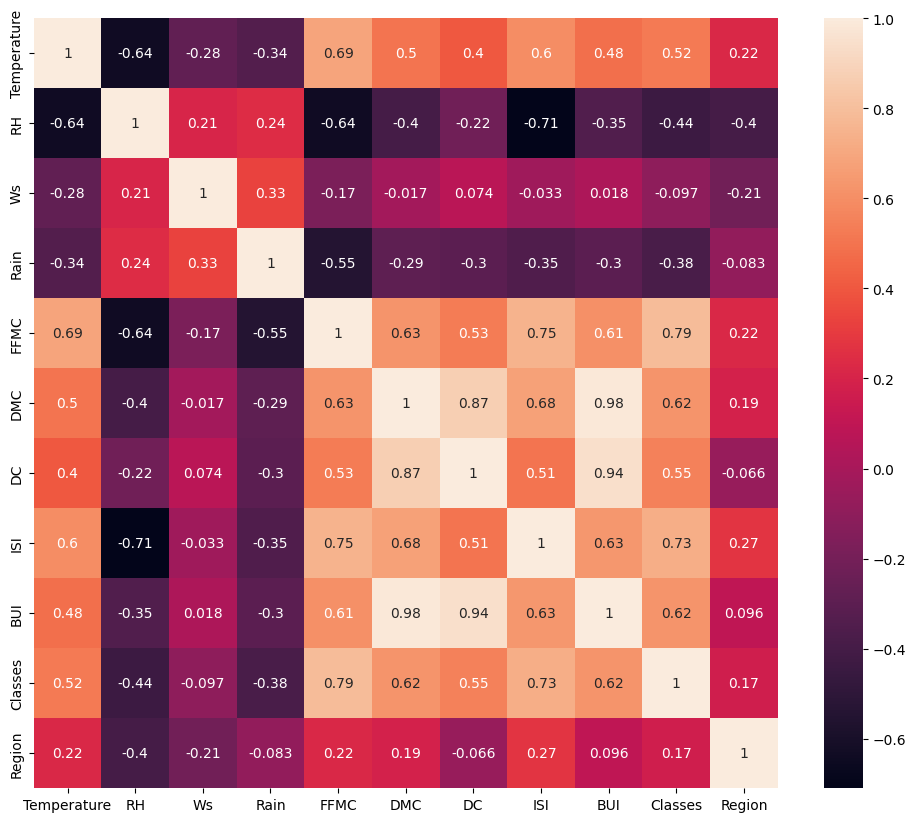

In [18]:
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [19]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)

    return col_corr

In [20]:
#threshold - Domain expert
corr_features = correlation(X_train,0.85)
corr_features

{'BUI', 'DC'}

In [21]:
# Drop Features which is highly correlated
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape

(140, 9)

In [22]:
# Feature scaling or standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
X_train_scaled

array([[ 0.2740571 , -1.13119295, -0.65824277, ..., -0.67911126,
        -1.13801668,  0.95802308],
       [ 0.54811421, -0.66046297,  0.90368923, ...,  1.00343833,
         0.87872174, -1.04381619],
       [ 0.2740571 ,  0.07925556, -1.04872577, ...,  0.51941722,
         0.87872174,  0.95802308],
       ...,
       [-1.91839973,  0.88622122,  0.51320623, ..., -1.07093788,
        -1.13801668, -1.04381619],
       [ 0.54811421, -0.25698014,  0.12272323, ...,  0.58856309,
         0.87872174,  0.95802308],
       [-0.54811421,  0.95346836,  2.07513823, ..., -0.86350026,
        -1.13801668, -1.04381619]])

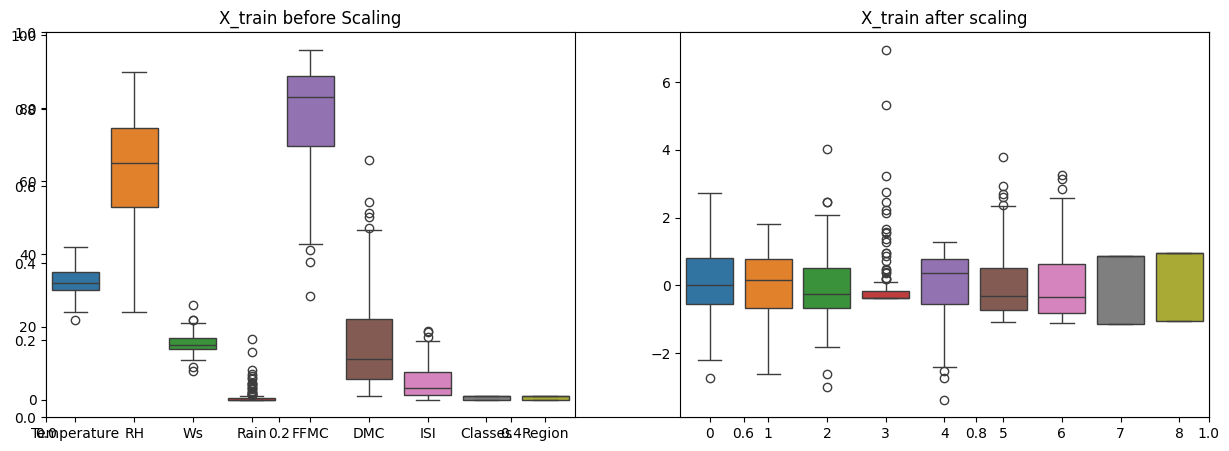

In [24]:
# Box plot to understand the effect of Standard Scalar
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data = X_train)
plt.title('X_train before Scaling')
plt.subplot(1,2,2)
sns.boxplot(data = X_train_scaled)
plt.title('X_train after scaling')
plt.show()

## Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

Mean Absolute Error:  0.6224506425469775
R2 Score:  0.9844891061652054


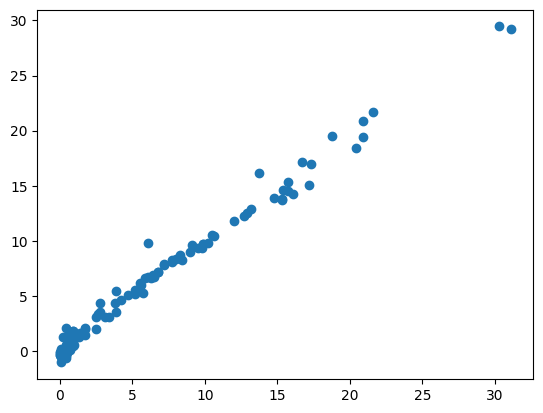

In [26]:
linreg = LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred = linreg.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute Error: ",mae)
print("R2 Score: ",score)
plt.scatter(y_test,y_pred)

### Lasso Regression

Mean Absolute Error:  1.1673007168527065
R2 Score:  0.9493784991250214


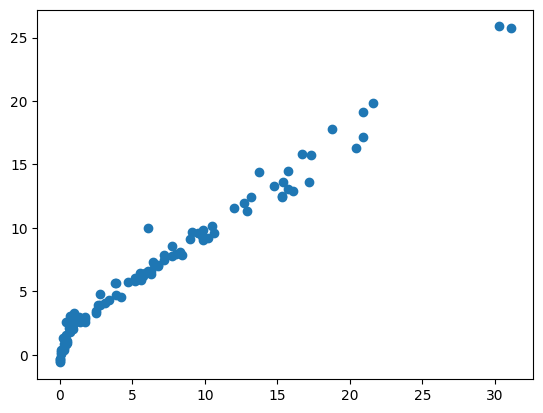

In [27]:

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score
lasso = Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute Error: ",mae)
print("R2 Score: ",score)
plt.scatter(y_test,y_pred)

Mean Absolute Error:  0.6431352436911846
R2 Score:  0.9837976569563178


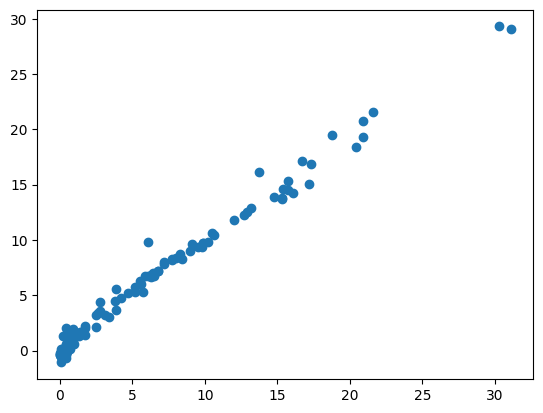

In [28]:
## Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score
ridge = Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute Error: ",mae)
print("R2 Score: ",score)
plt.scatter(y_test,y_pred)

Mean Absolute Error:  1.8546203169278344
R2 Score:  0.8820870444715918


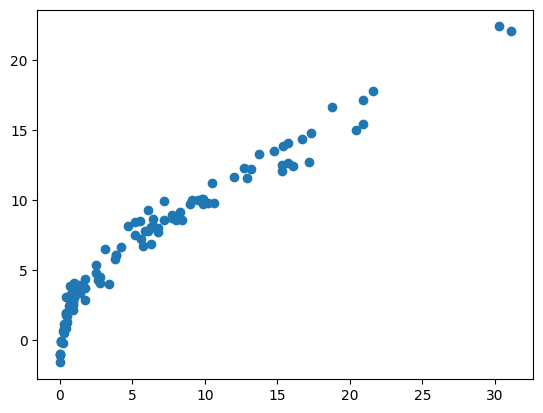

In [29]:
## Elasticnet Regression
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, r2_score
elasticnet = ElasticNet()
elasticnet.fit(X_train_scaled,y_train)
y_pred = elasticnet.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute Error: ",mae)
print("R2 Score: ",score)
plt.scatter(y_test,y_pred)

In [30]:
## Hyper Parameter Tuning
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)


LassoCV(cv=5)

In [31]:
lassocv.alpha_

0.03539668825091876

Mean absolute error: 0.6458346950199079
R2 Score:  0.9835024148478347


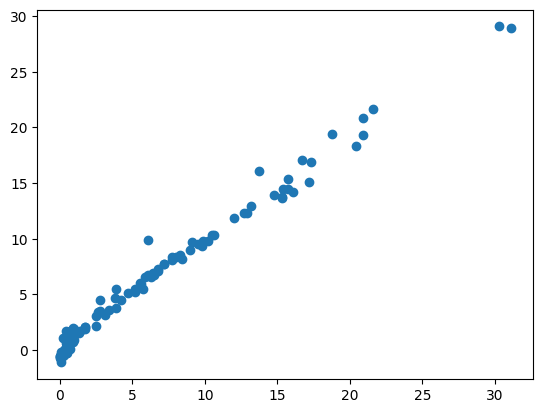

In [32]:
y_pred = lassocv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
score = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
print("Mean absolute error:",mae)
print("R2 Score: ",score)

Mean absolute error: 0.6431352436911846
R2 Score:  0.9837976569563178


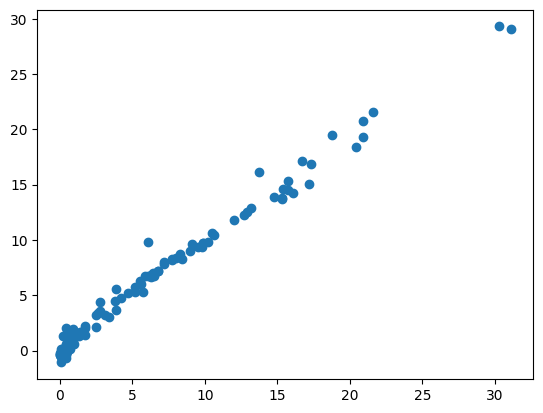

In [33]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error,r2_score
ridge = Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean absolute error:",mae)
print("R2 Score: ",score)
plt.scatter(y_test,y_pred)


Mean absolute error: 0.6431352436910378
R2 Score:  0.9837976569563286


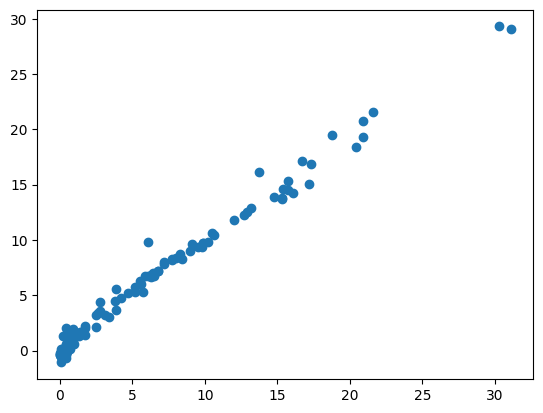

In [34]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error,r2_score
ridgecv = RidgeCV()
ridgecv.fit(X_train_scaled,y_train)
y_pred = ridgecv.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean absolute error:",mae)
print("R2 Score: ",score)
plt.scatter(y_test,y_pred)


Mean absolute error: 1.8546203169278344
R2 Score:  0.8820870444715918


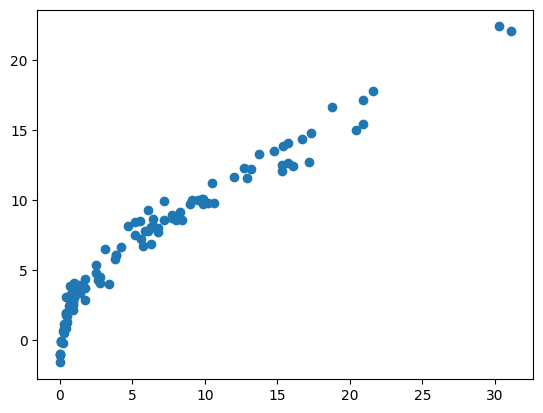

In [35]:
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.metrics import mean_absolute_error,r2_score
elasticnet = ElasticNet()
elasticnet.fit(X_train_scaled,y_train)
y_pred = elasticnet.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean absolute error:",mae)
print("R2 Score: ",score)
plt.scatter(y_test,y_pred)


Mean absolute error: 0.6558553635594085
R2 Score:  0.9833238161513811


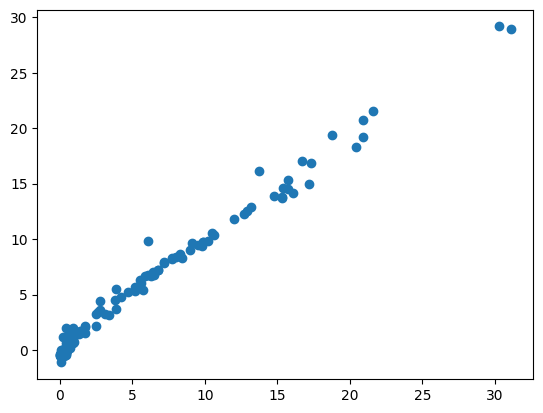

In [36]:
elasticnetcv = ElasticNetCV()
elasticnetcv.fit(X_train_scaled,y_train)
y_pred = elasticnetcv.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean absolute error:",mae)
print("R2 Score: ",score)
plt.scatter(y_test,y_pred)

In [38]:
# Pickling the machine leaening models
scaler


StandardScaler()

In [39]:
ridge

Ridge()

In [40]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))